In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 7.7 MB/s 
     |████████████████████████████████| 1.2 MB 61.1 MB/s 
     |████████████████████████████████| 46 kB 5.4 MB/s 
     |████████████████████████████████| 189 kB 80.2 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 51 kB 385 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from IPython.display import Image, display

In [ ]:
def export_model(learn, filename):
  learn.export(Path(DRIVE_FOLDER + '/MyDrive/' + filename + '.pkl'))

In [ ]:
def load_model(filename):
  return load_learner(Path(DRIVE_FOLDER + '/MyDrive/' + filename + '.pkl'))

In [ ]:
#redefined in order to correct the current fastai version bug
def plot_top_losses_fix(interp, k, largest=True, **kwargs):
  losses,idx = interp.top_losses(k, largest)

  if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
  
  if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
  else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
  
  b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
  x,y,its = interp.dl._pre_show_batch(b, max_n=k)
  b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
  x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
  
  if its is not None:
      plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
DRIVE_FOLDER = 'gdrive'

In [ ]:
DATASET_PATH = Path(DRIVE_FOLDER + '/MyDrive/ASL_dataset')

In [ ]:
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=100),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=2)
)
datablock.summary(DATASET_PATH)

Setting-up type transforms pipelines
Found 858 items
2 datasets of sizes 601,257
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      gdrive/MyDrive/ASL_dataset/K/K2_2.png
    applying PILBase.create gives
      PILImage mode=RGB size=83x117
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      gdrive/MyDrive/ASL_dataset/K/K2_2.png
    applying parent_label gives
      K
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(10)

Final sample: (PILImage mode=RGB size=83x117, TensorCategory(10))


Found 858 items
2 datasets of sizes 601,257
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (224, 224)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)



Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -- {'size': (224, 224), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
    starting from
      (PILImage mode=RGB size=83x117, TensorCategory(10))
    applying Resize -- {'size': (224, 224), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} gives
      (PILImage mode=RGB size=224x224, TensorCategory(10))
    applying ToTensor gives
      (TensorImage of size 3x224x224, TensorCategory(10))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.4, 'p': 1.0, 'draw': None, 'batch': False}
    starting from
      (TensorImage of size 4x3x224x224, Tenso

In [ ]:
dls = datablock.dataloaders(DATASET_PATH, batch_size=30)

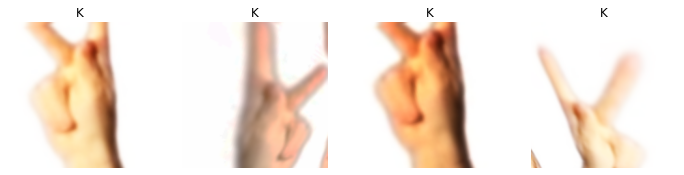

In [ ]:
dls.show_batch(nrows=1, ncols=4, unique=True)

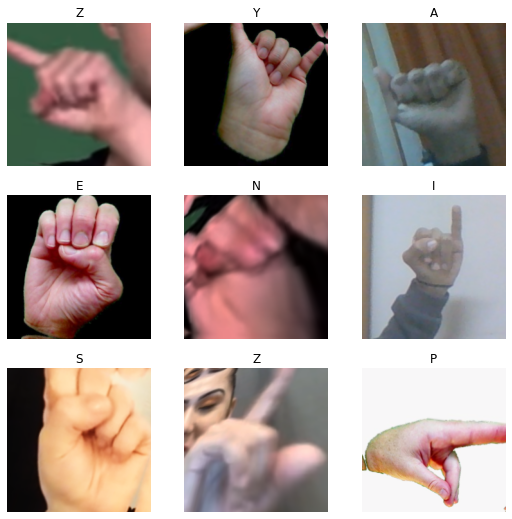

In [ ]:
dls.show_batch(max_n=9)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,time
0,4.771427,3.317484,0.902724,03:01


epoch,train_loss,valid_loss,error_rate,time
0,3.675535,3.035361,0.879377,00:18
1,3.548532,2.756991,0.817121,00:18
2,3.289171,2.447762,0.739300,00:18
3,2.971341,2.104583,0.626459,00:18
4,2.689076,1.780547,0.560311,00:18
5,2.323075,1.457437,0.482490,00:18
6,2.027158,1.298705,0.408560,00:18
7,1.720241,1.115829,0.361868,00:18
8,1.440612,1.043838,0.330739,00:18
9,1.217558,0.928684,0.280156,00:18


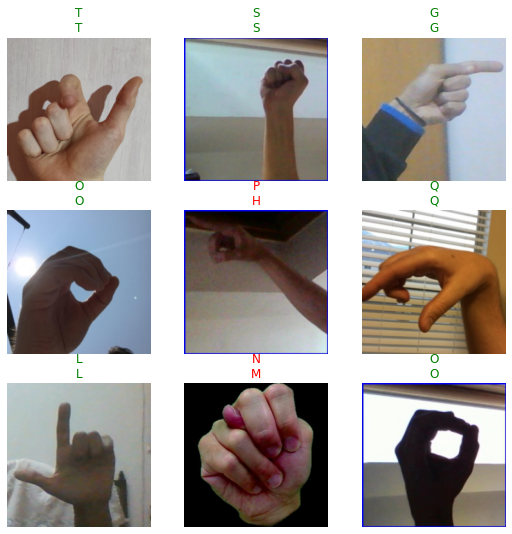

In [ ]:
learn.show_results(max_n=9)

In [ ]:
export_model(learn, 'asl_model')

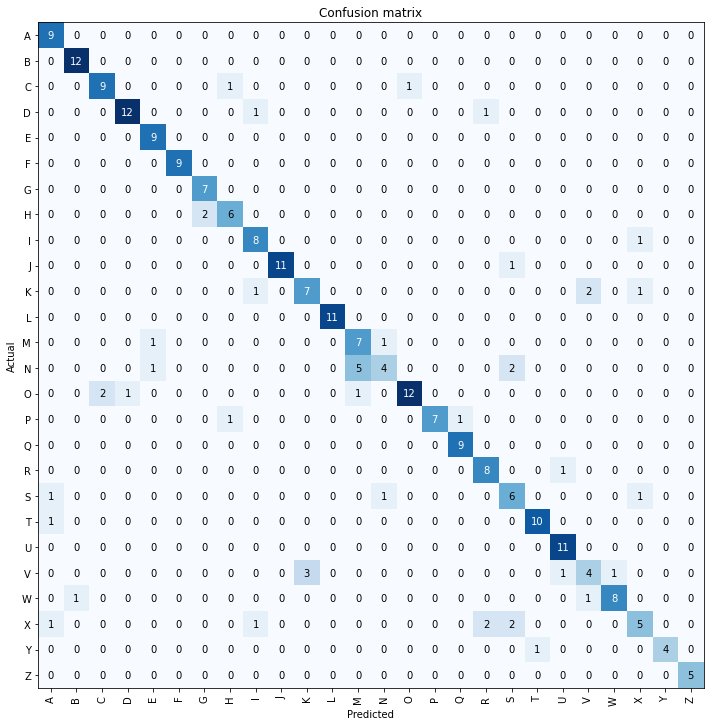

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10))

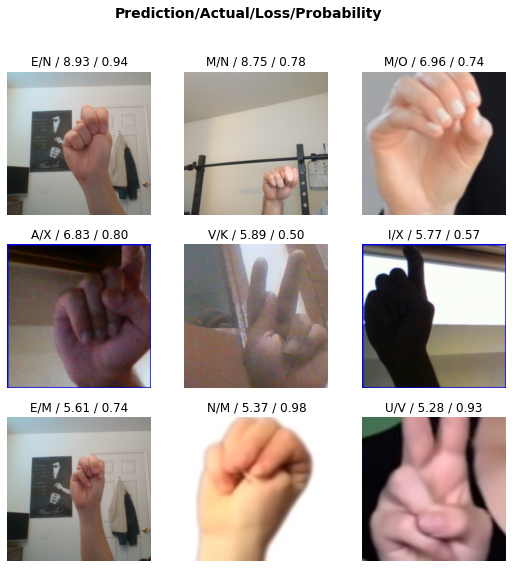

In [ ]:
plot_top_losses_fix(interp, 9, nrows=3)

In [ ]:
OWN_VALIDATION_IMGS = DRIVE_FOLDER + '/MyDrive/ASL_own_validation/'

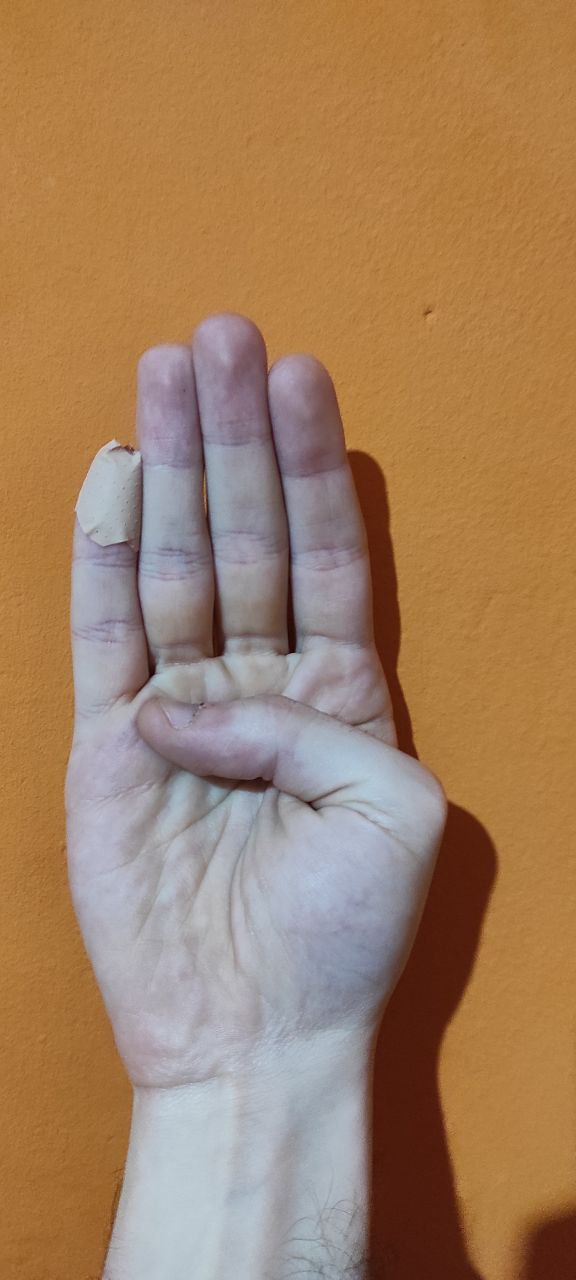

('B',
 TensorBase(1),
 TensorBase([3.7231e-04, 9.7857e-01, 8.8174e-06, 4.4758e-05, 5.0909e-04, 7.5522e-05, 2.2910e-05, 3.8520e-05, 2.7113e-06, 8.8603e-05, 3.7562e-06, 1.6441e-05, 2.5047e-04, 1.8356e-05, 7.0090e-05, 1.9108e-06,
         1.8666e-04, 4.5378e-06, 3.7714e-04, 1.7626e-02, 1.4978e-03, 3.4935e-05, 1.7144e-04, 1.3875e-06, 2.4309e-06, 9.5764e-08]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'B.jpg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

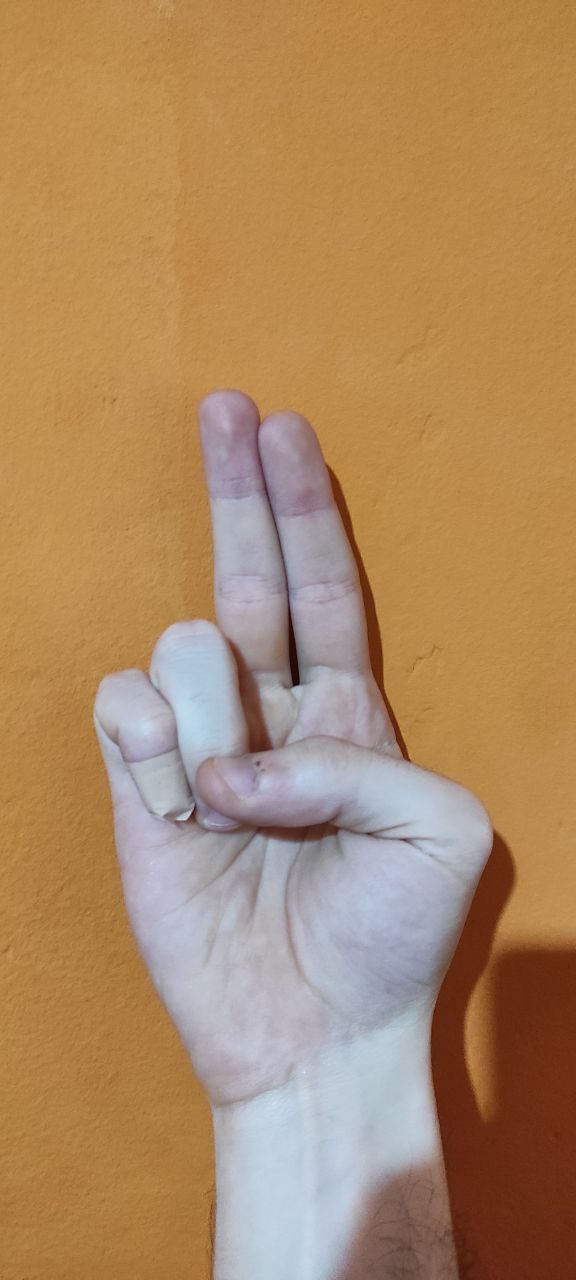

('U',
 TensorBase(20),
 TensorBase([4.3654e-08, 8.3328e-05, 2.8755e-07, 3.8048e-07, 1.6062e-06, 2.4231e-05, 3.5108e-08, 3.2610e-07, 5.4625e-08, 1.4681e-08, 2.5875e-08, 3.8616e-06, 4.0217e-08, 1.8499e-07, 1.1907e-06, 1.0927e-08,
         3.9271e-07, 1.2760e-07, 2.7212e-05, 3.7495e-03, 9.9610e-01, 5.4866e-06, 4.9288e-08, 1.6345e-07, 5.3434e-08, 8.6160e-10]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'U.jpg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

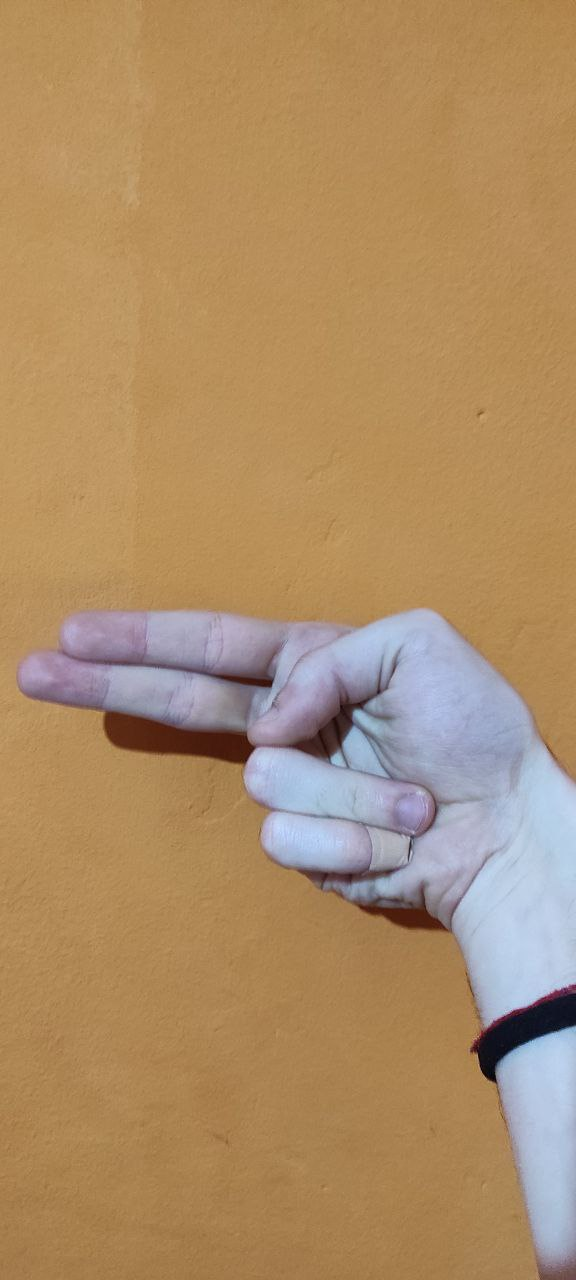

('H',
 TensorBase(7),
 TensorBase([5.4074e-07, 1.6971e-05, 2.9990e-06, 2.3157e-08, 6.0130e-07, 5.9483e-07, 5.0508e-04, 9.9941e-01, 2.1158e-08, 7.8538e-06, 6.1949e-06, 4.8564e-08, 6.4814e-07, 1.5087e-05, 2.6826e-06, 1.1988e-05,
         1.5859e-05, 1.8549e-07, 9.8716e-07, 1.0370e-06, 3.5884e-06, 7.2826e-08, 2.6902e-07, 5.6059e-07, 1.6117e-07, 1.5680e-07]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'H.jpg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

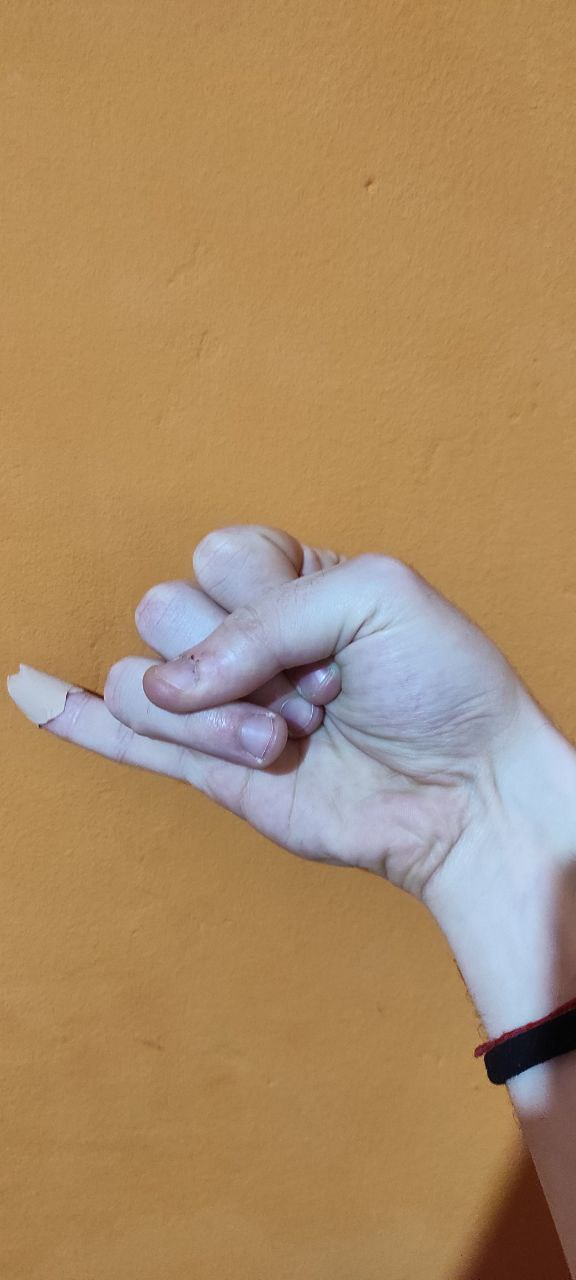

('J',
 TensorBase(9),
 TensorBase([1.4711e-06, 9.8349e-06, 1.7772e-05, 6.4473e-07, 4.8675e-04, 1.0072e-05, 5.4712e-05, 1.4710e-05, 3.5924e-04, 7.0391e-01, 2.2112e-08, 8.3803e-06, 4.0348e-05, 9.9302e-05, 3.2135e-05, 3.3826e-05,
         5.3254e-05, 6.1059e-06, 2.1064e-01, 8.2414e-02, 6.6324e-06, 4.3319e-05, 8.0674e-06, 1.6872e-03, 4.3922e-05, 1.5696e-05]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'J.jpg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

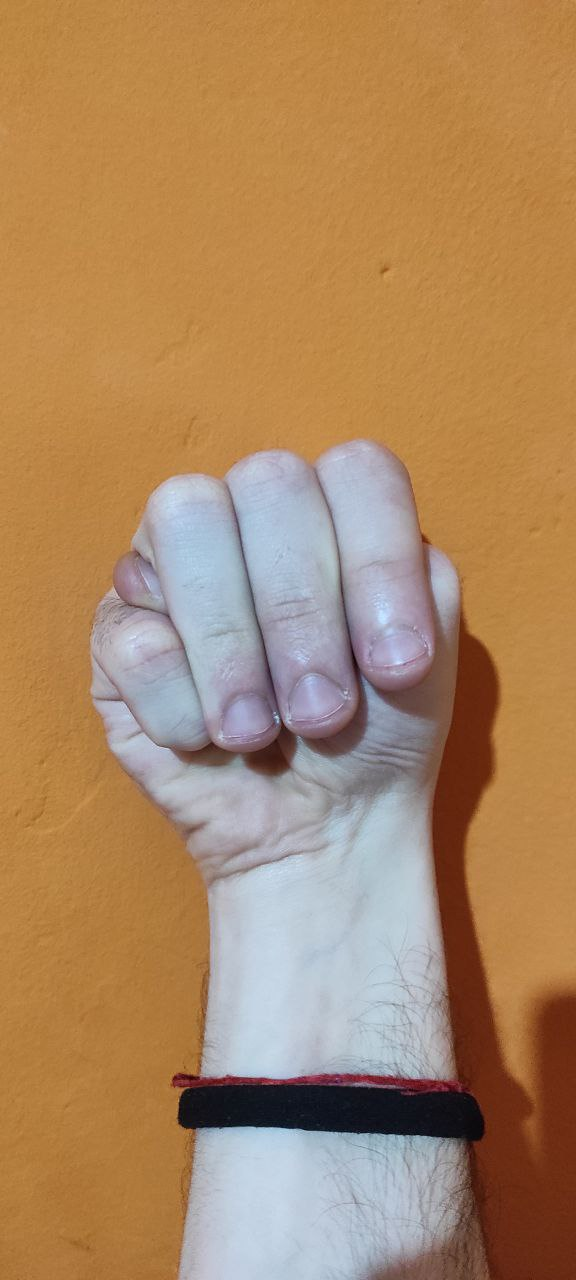

('M',
 TensorBase(12),
 TensorBase([1.8111e-03, 3.8995e-03, 1.0862e-06, 6.0701e-08, 1.2330e-03, 1.3299e-05, 7.6419e-06, 2.0859e-05, 1.1941e-07, 1.6616e-05, 2.4215e-07, 1.0419e-07, 9.9172e-01, 8.4254e-04, 2.2726e-06, 1.5071e-06,
         3.9920e-06, 5.4004e-08, 6.4919e-05, 3.5298e-04, 1.7656e-06, 4.1088e-07, 1.2578e-06, 5.4863e-07, 3.2216e-08, 1.4808e-08]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'M.jpg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

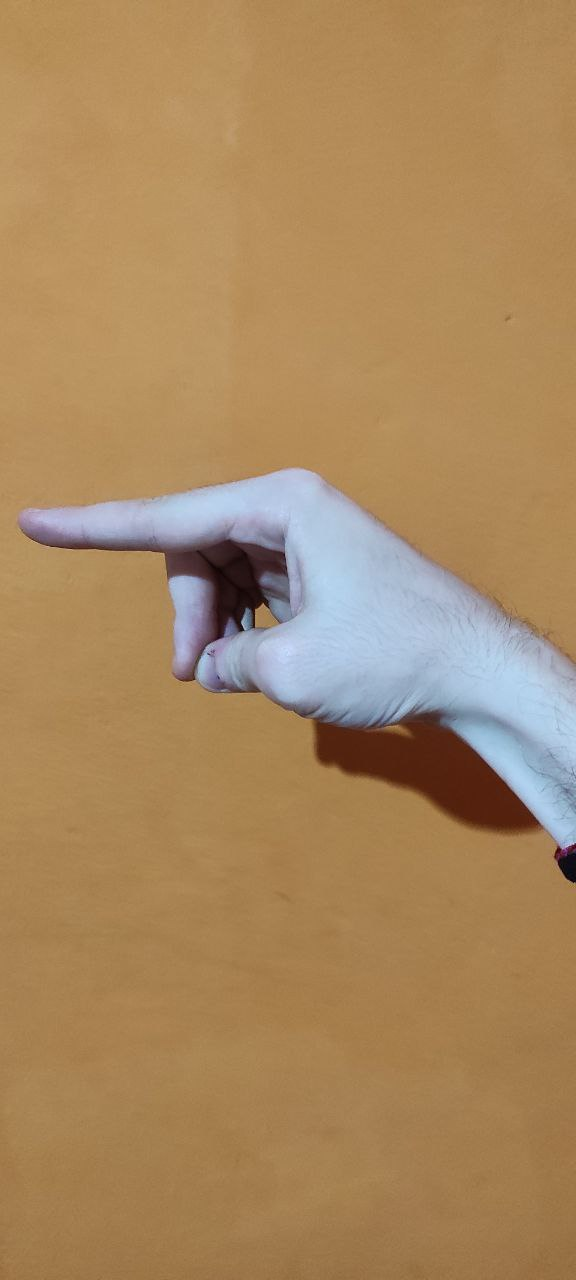

('P',
 TensorBase(15),
 TensorBase([1.2651e-05, 9.7923e-07, 2.0815e-03, 5.5518e-07, 1.0935e-06, 6.1254e-06, 6.8219e-04, 2.0276e-05, 2.8953e-08, 6.5633e-05, 9.1138e-07, 1.9548e-04, 1.1863e-07, 3.3632e-07, 9.1533e-06, 9.7988e-01,
         1.6946e-02, 1.5622e-06, 1.1883e-06, 9.3915e-06, 1.6840e-07, 1.1046e-05, 6.0734e-07, 1.6759e-07, 6.7554e-05, 7.8190e-06]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'P.jpg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

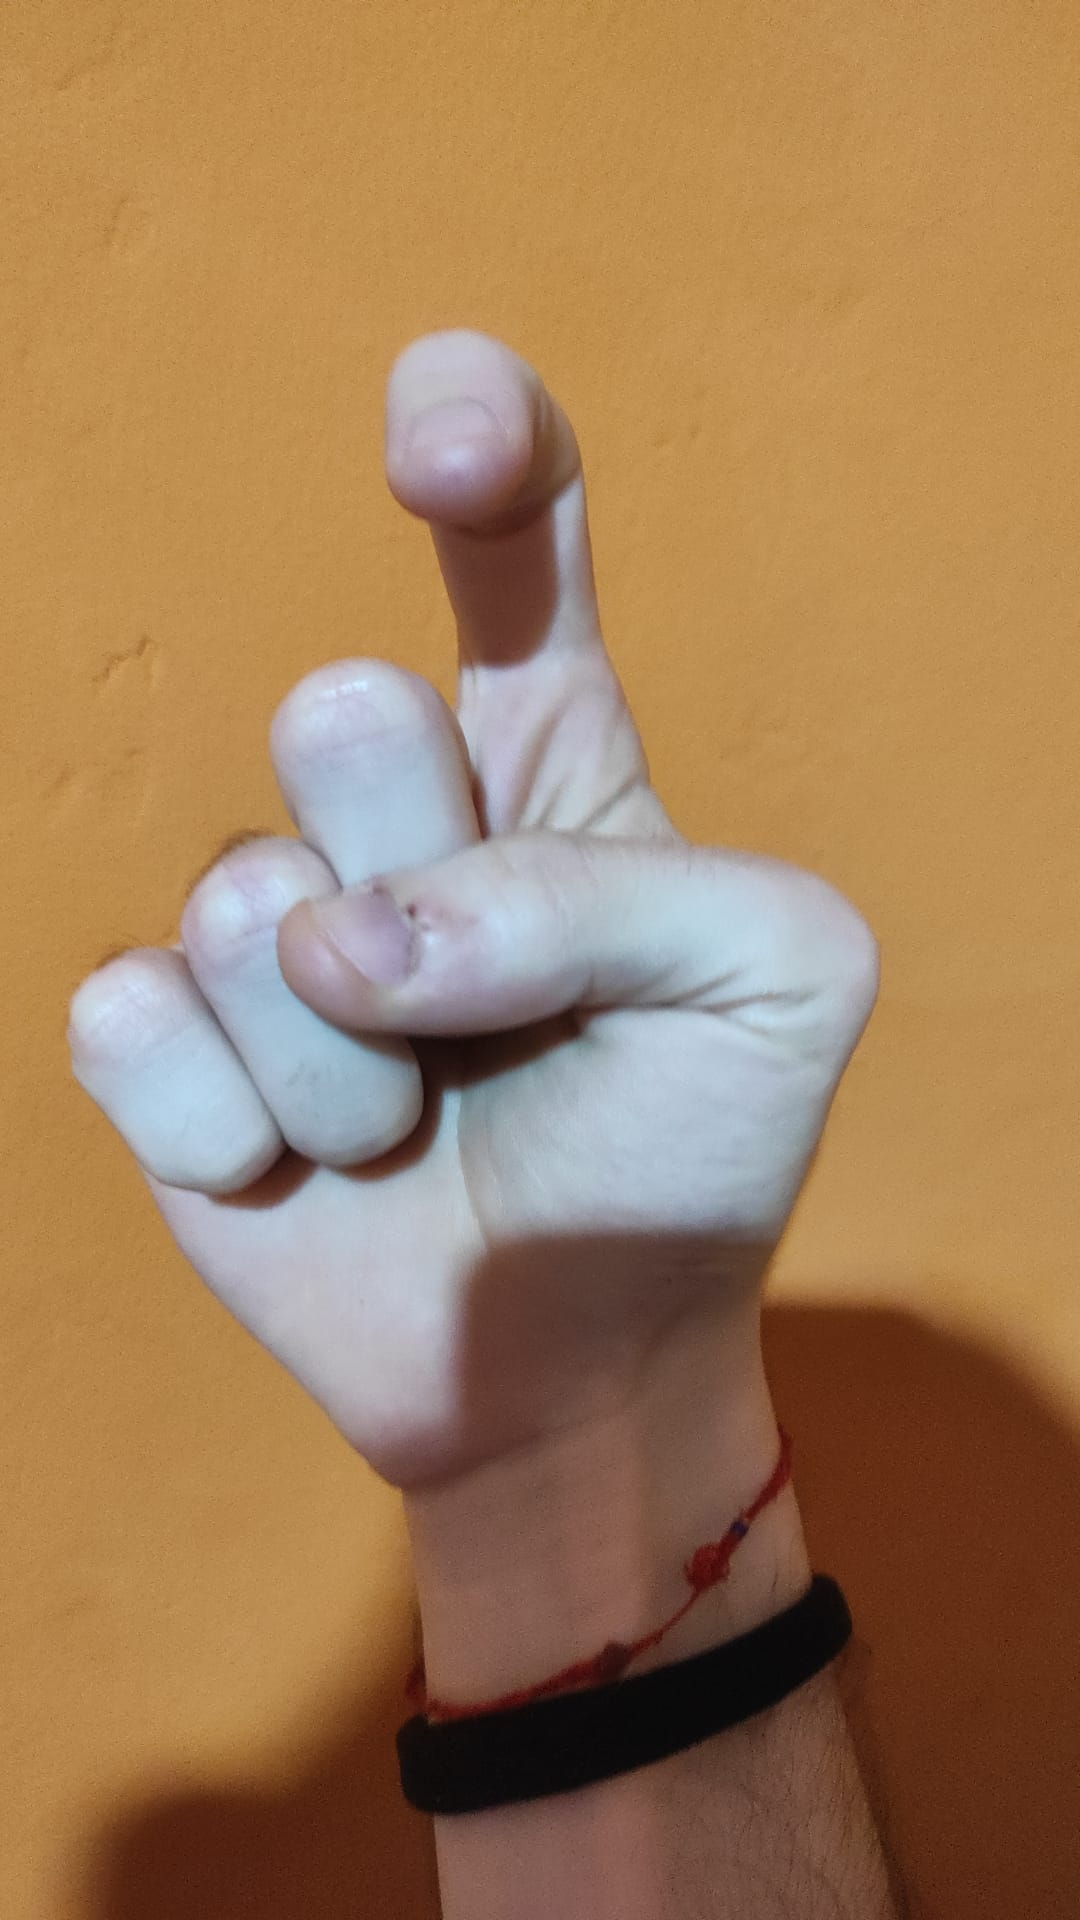

('X',
 TensorBase(23),
 TensorBase([1.6963e-04, 3.0474e-06, 2.1592e-05, 2.1537e-05, 2.5464e-04, 5.7259e-04, 1.8672e-06, 2.9410e-06, 1.3783e-05, 6.5155e-06, 3.0344e-05, 3.0215e-03, 2.2560e-05, 1.0617e-04, 2.9497e-04, 2.0833e-05,
         6.2682e-05, 2.3748e-01, 3.1243e-02, 3.0104e-01, 4.9820e-03, 3.8802e-04, 5.7303e-05, 4.2015e-01, 3.0331e-05, 1.7160e-07]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'X.jpeg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

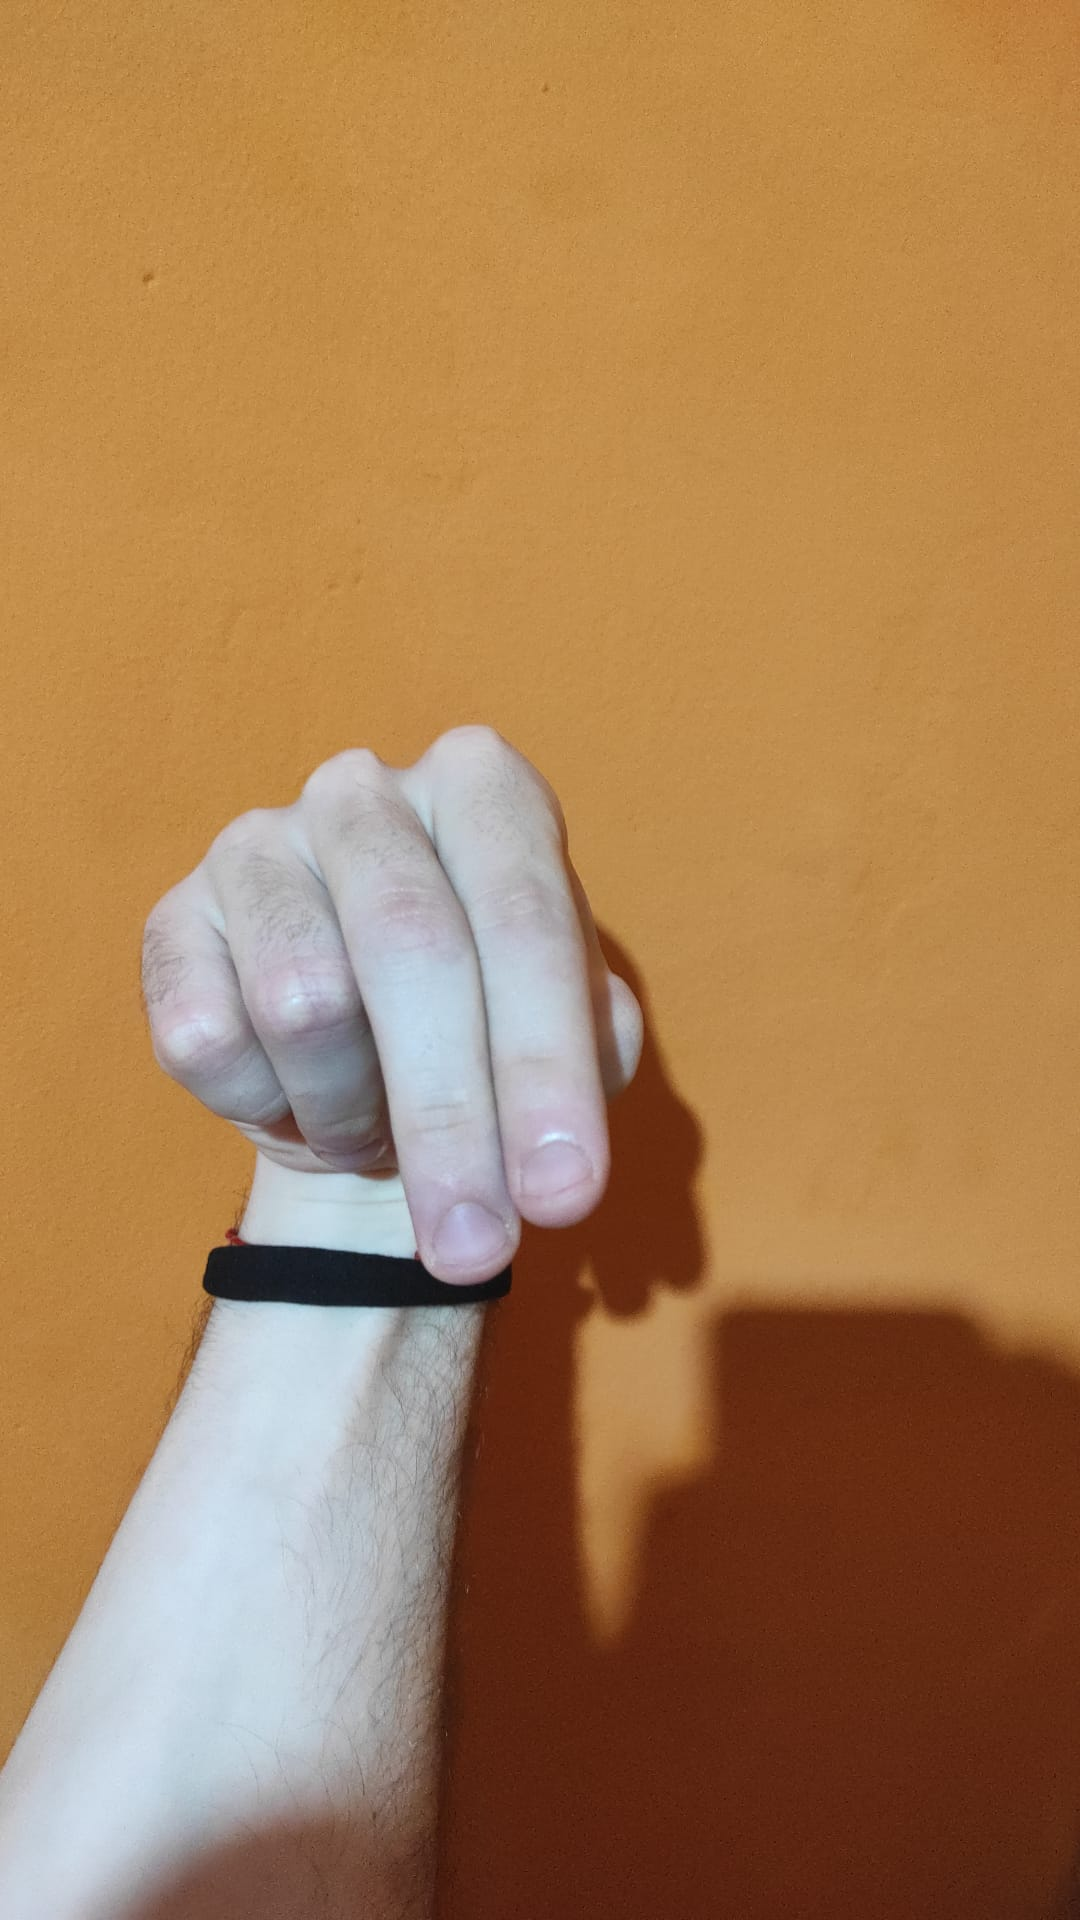

('N',
 TensorBase(13),
 TensorBase([2.2760e-05, 4.5435e-05, 5.8917e-06, 2.1699e-07, 1.1586e-05, 7.9959e-06, 2.3453e-05, 5.3320e-06, 3.4091e-07, 1.0537e-05, 1.4229e-07, 3.0131e-07, 1.7717e-01, 8.2152e-01, 2.1183e-05, 2.4367e-06,
         1.0072e-04, 2.7080e-07, 3.6410e-04, 5.9308e-04, 3.0050e-05, 1.6290e-06, 9.3453e-07, 5.5276e-05, 2.9813e-07, 1.5375e-06]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'N.jpeg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

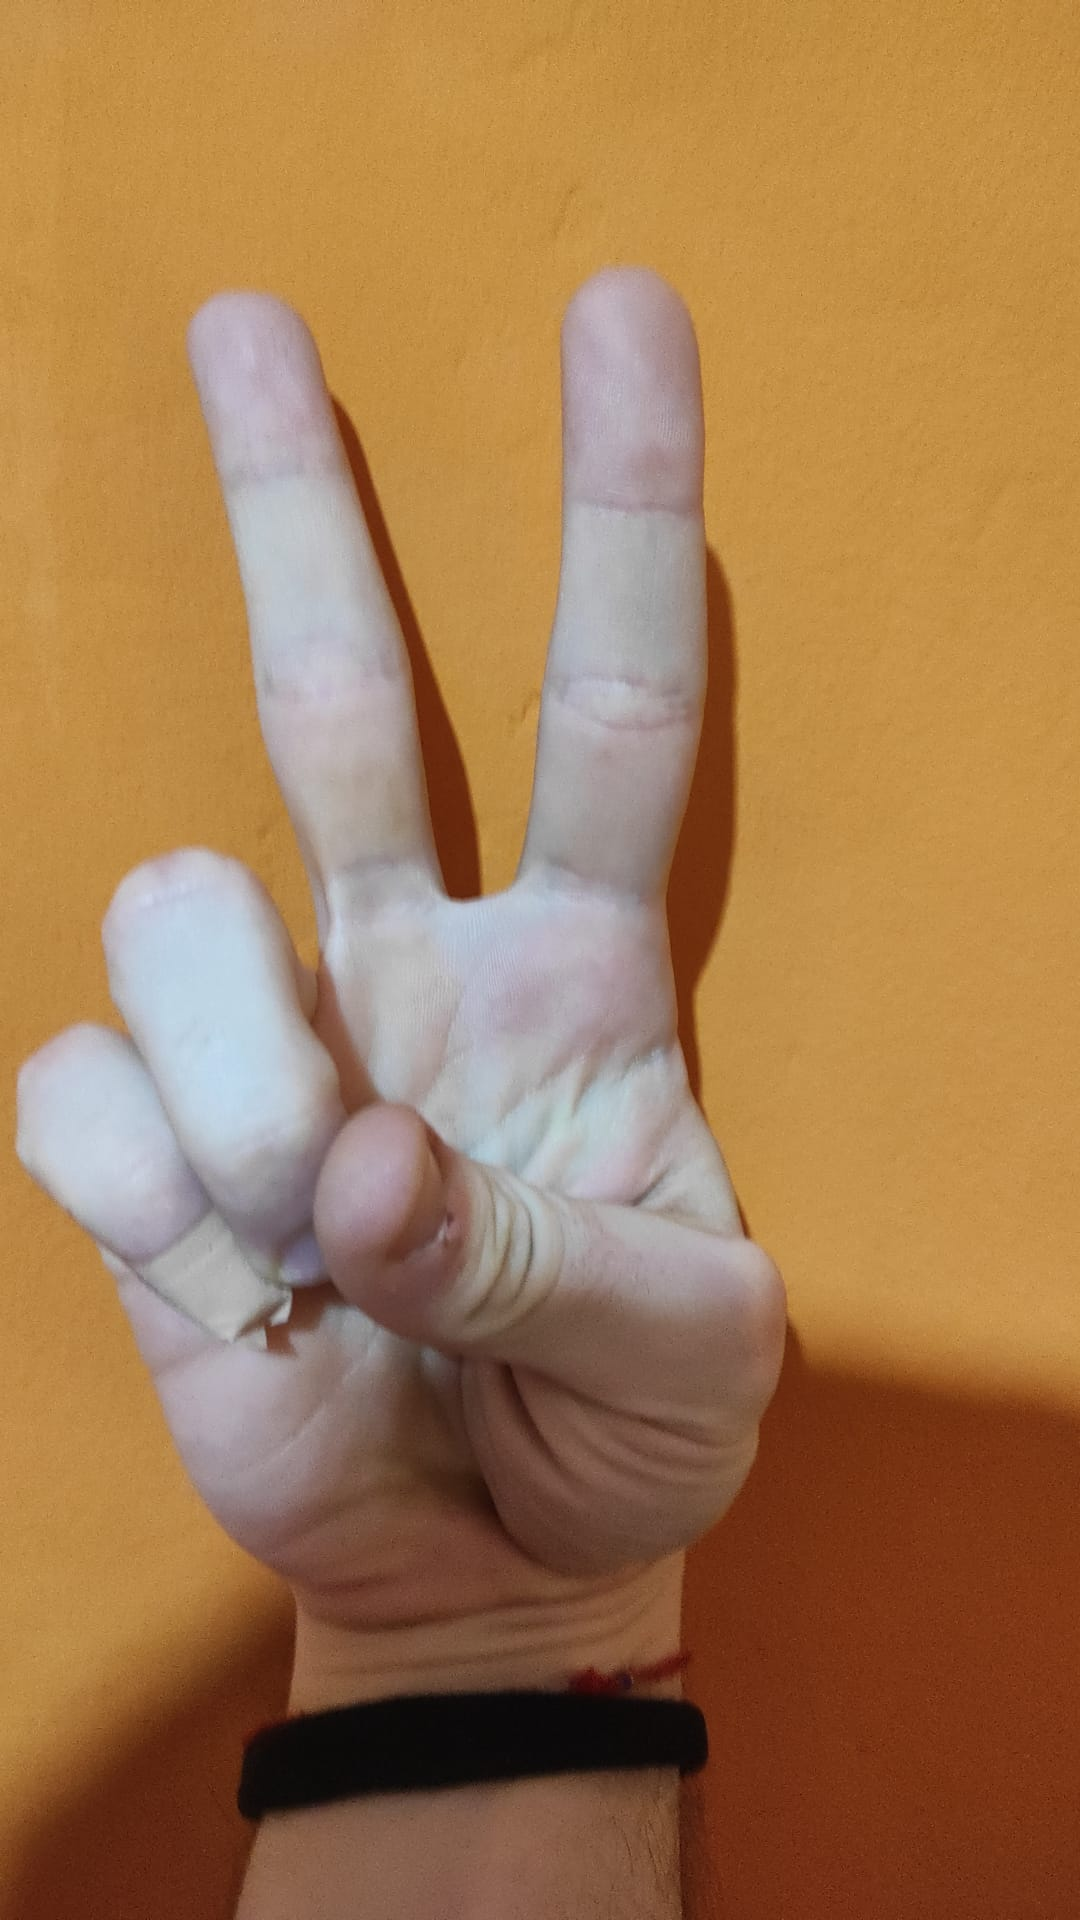

('V',
 TensorBase(21),
 TensorBase([4.4473e-07, 2.9496e-05, 2.2725e-07, 3.2463e-06, 2.1659e-06, 2.6294e-05, 6.7617e-07, 5.4286e-07, 8.7449e-06, 1.0815e-06, 3.4338e-04, 2.9999e-05, 8.6825e-07, 5.1582e-05, 1.3352e-05, 7.2693e-06,
         3.6337e-06, 4.1196e-05, 1.5974e-06, 1.9105e-04, 6.6470e-05, 9.7616e-01, 2.3015e-02, 2.1176e-07, 4.7550e-06, 4.8893e-07]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'V.jpeg'
display(Image(imm_file, height=200))
learn.predict(imm_file)

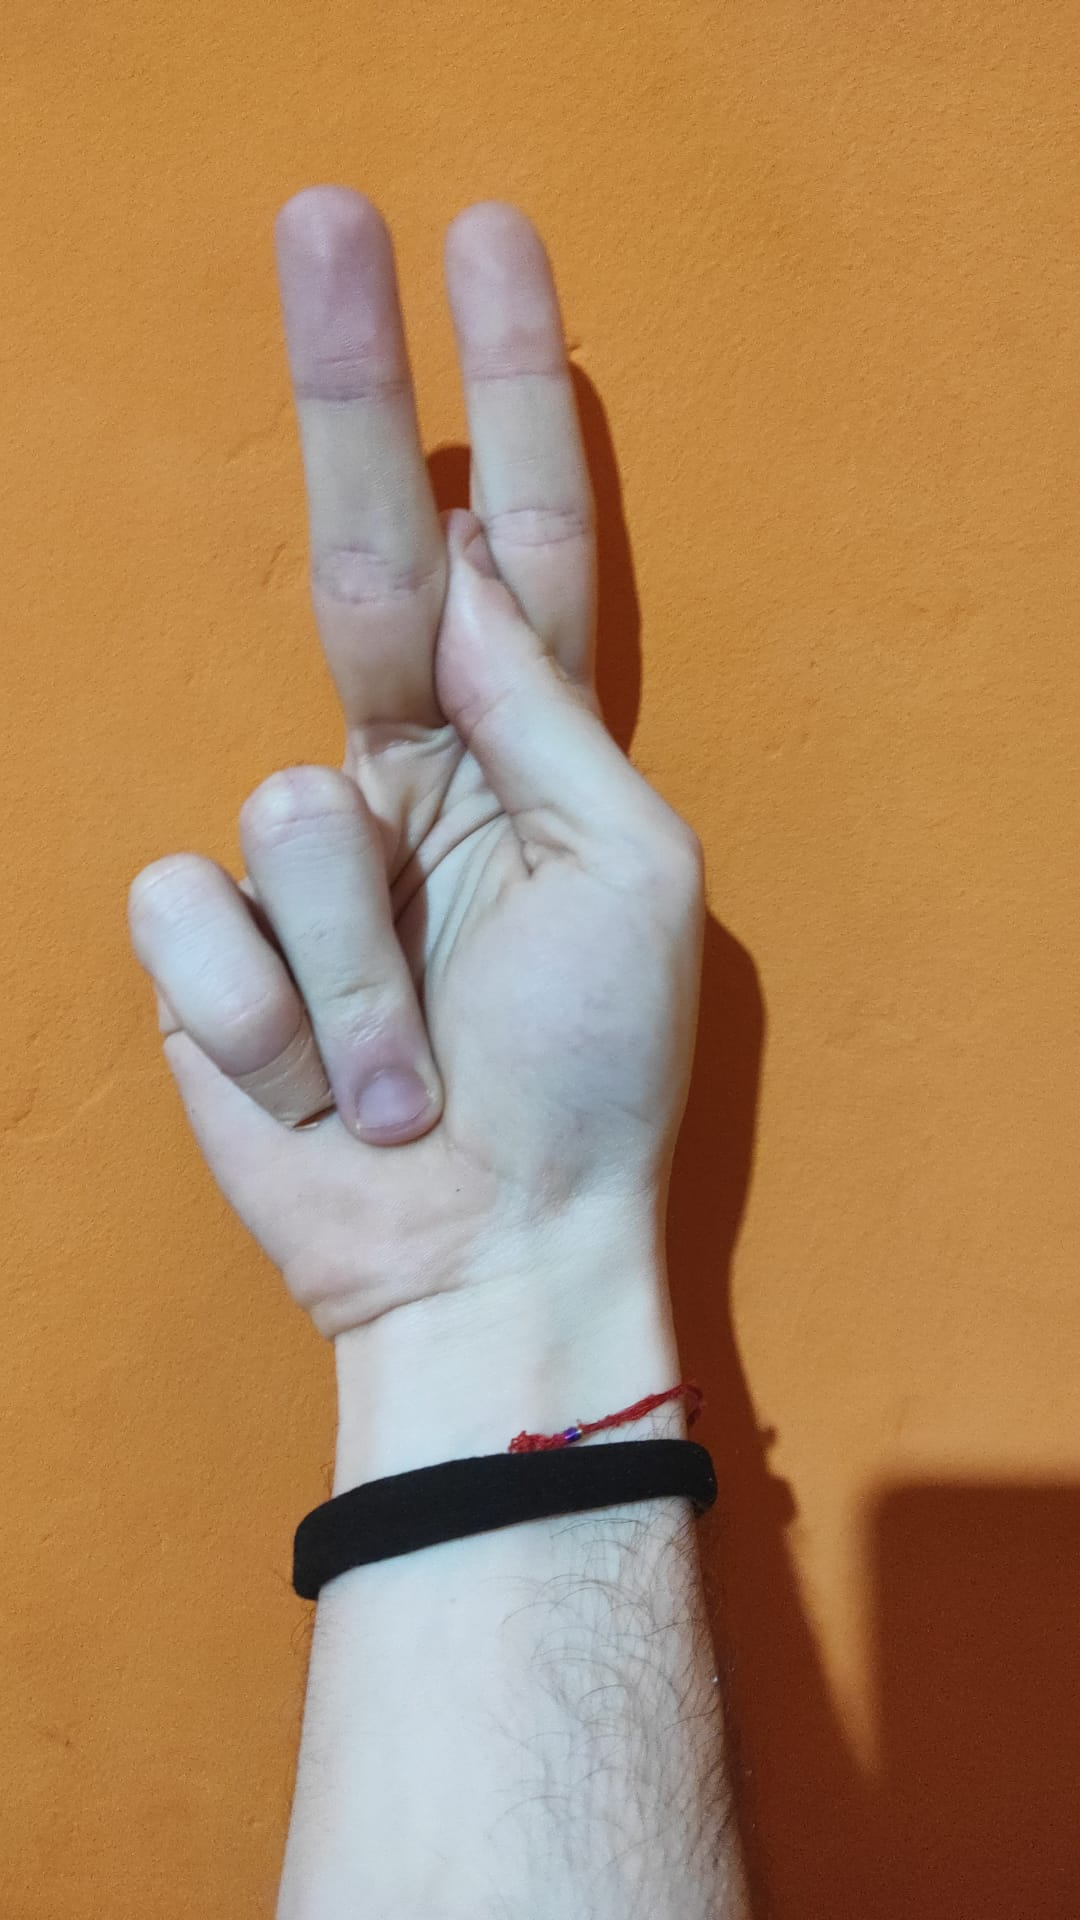

('K',
 TensorBase(10),
 TensorBase([2.9361e-04, 1.1940e-02, 8.2895e-05, 6.3557e-04, 1.7414e-04, 3.4242e-03, 4.3382e-04, 2.3586e-04, 1.4720e-04, 1.5437e-04, 5.4363e-01, 5.4168e-03, 1.6134e-04, 3.6635e-03, 2.2576e-03, 1.9700e-04,
         1.8583e-04, 1.2024e-02, 2.2408e-04, 2.8543e-01, 8.4852e-02, 4.0539e-02, 9.1576e-04, 3.5961e-04, 2.5522e-03, 7.5944e-05]))

In [ ]:
imm_file = OWN_VALIDATION_IMGS + 'K.jpeg'
display(Image(imm_file, height=200))
learn.predict(imm_file)